# K-Mean

## 数据预处理

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [3]:


# 读取数据
data = pd.read_csv('Loan_defaults_training.csv')
data=data.dropna()

# 选择用于聚类的特征
features = [
    'loanAmnt', 'term', 'interestRate', 'installment', 'annualIncome', 
    'dti', 'delinquency_2years', 'openAcc', 'pubRec', 
    'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc'
]

# 提取特征数据
X = data[features]

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 确定最佳聚类数

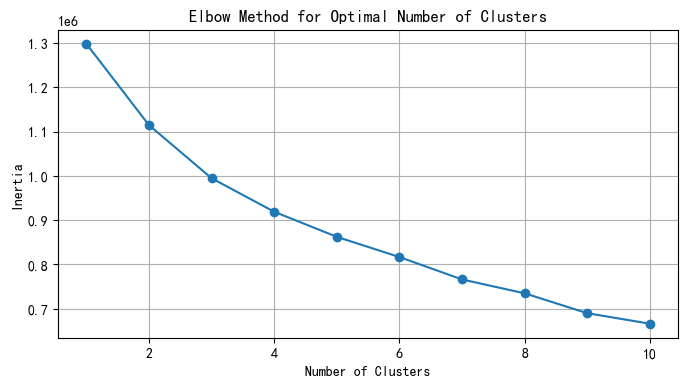

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 确定最佳聚类数
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 绘制肘部法图形
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.savefig('肘部法示意图.png', dpi=300, bbox_inches='tight')
plt.show()


## 执行聚类分析

In [5]:
# 使用最佳聚类数进行聚类
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 将聚类结果添加到原数据集中
data['Cluster'] = clusters


## 聚类结果可视化

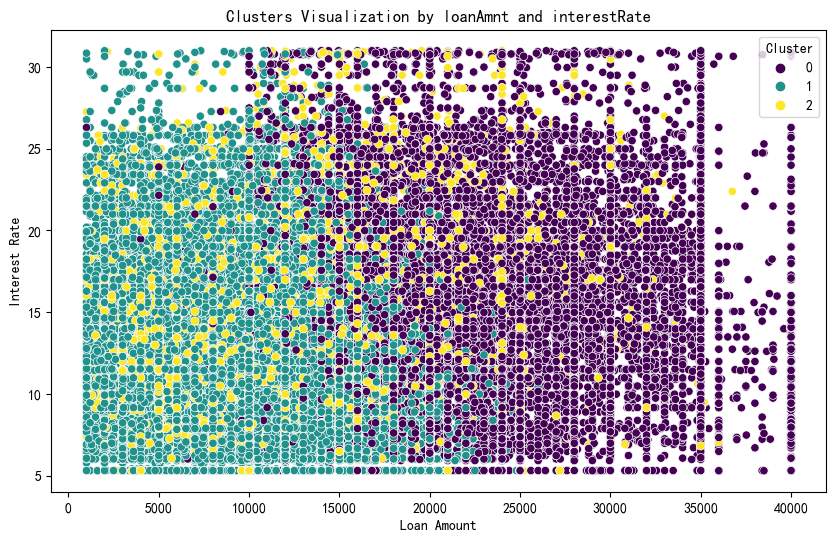

In [6]:
import seaborn as sns

# 可视化聚类结果（以贷款金额和贷款利率为例）
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['loanAmnt'], y=data['interestRate'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters Visualization by loanAmnt and interestRate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.savefig('Kmeans聚类结果可视化loanAmnt.png', dpi=300, bbox_inches='tight')
plt.show()


## 结果分析

In [7]:
# 查看每个聚类的数量
cluster_counts = data['Cluster'].value_counts()

# 查看每个聚类的中心
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)

cluster_counts

1    54096
0    32656
2    13118
Name: Cluster, dtype: int64

In [8]:
cluster_centers_df

,loanAmnt,term,interestRate,installment,annualIncome,dti,delinquency_2years,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc
0,23585.515679,3.996570,14.723905,690.138052,102846.905357,20.389474,0.352064,14.278724,0.055273,1.077903e-02,27705.746632,57.133684,30.942277
1,9564.727711,3.190510,12.237905,304.602223,62002.604022,17.274191,0.324195,10.140951,0.038228,-9.547918e-15,11112.028320,50.071100,21.247370
2,11592.159030,3.443089,13.845166,358.043479,65903.554722,17.528526,0.210185,11.043760,1.332317,9.946634e-01,8681.207593,46.052985,25.508348


# 层次聚类（Hierarchical Clustering）

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 使用层次聚类进行聚类
Z = linkage(X_scaled, method='ward')

# 绘制层次聚类树
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.savefig('层次聚类结果可视化.png', dpi=300, bbox_inches='tight')
plt.show()
